# U.S. Medical Insurance Costs

Now having gone through the Pandas and Data Visualization modules, this verion of the project will present some brief data visualization of the data, explain the concept of linear regression then apply a linear regression to the data producing an insurance cost estimate function.   

### Import Data


In [1]:
import pandas as pd
import numpy as np

In [2]:
# load in the csv as a Pandas dataframe
insurance_df = pd.read_csv('insurance.csv')

# Display a summary of the columns (name, count, datatype)
print(insurance_df.info())

# Display the first few columns of the dataframe
insurance_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


These tables show that there is a mix of categorical and numerical data. These also show that there is no missing data.

### Suggested Analysis

* **Age of patients**

In [3]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

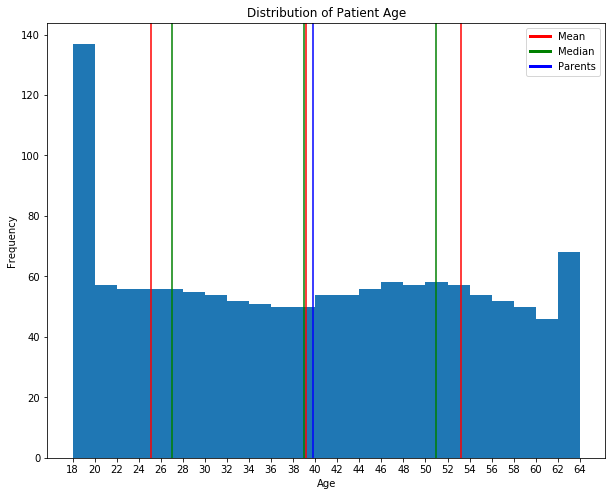

The average patient age is: 39.21 years old with a standard devation of 14.05 years.
The median patient age is: 39 years old with an interquartile range of 24 years.
The average age of parents is: 39.78 years and the median parent age is 40 years. 


<Figure size 432x288 with 0 Axes>

In [4]:
age_avg = insurance_df.age.mean()
age_std = insurance_df.age.std()
age_med = insurance_df.age.median()
age_iqr = insurance_df.age.quantile(0.75) - insurance_df.age.quantile(0.25)
parent_age_avg = insurance_df[insurance_df.children > 0].age.mean()
parent_age_med = insurance_df[insurance_df.children > 0].age.median()

plt.figure(figsize=(10,8))
ax = plt.subplot()

plt.hist(insurance_df.age, bins = 23)
plt.axvline(age_avg, color = 'r')
plt.axvline(age_avg + age_std, color = 'r')
plt.axvline(age_avg - age_std, color = 'r')

plt.axvline(age_med, color = 'g')
plt.axvline(age_med + age_iqr / 2, color = 'g')
plt.axvline(age_med - age_iqr / 2, color = 'g')

plt.axvline(parent_age_avg, color = 'b')

ax.set_xticks([18 + 2 * i for i in range(24)])

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Age')

lines = [Line2D([0], [0], color='red', linewidth=3), 
         Line2D([0], [0], color='green', linewidth=3),
         Line2D([0], [0], color='blue', linewidth=3)]
labels = ['Mean', 'Median', 'Parents']
plt.legend(lines, labels)
plt.show()
plt.clf()
print('The average patient age is: {} years old with a standard devation of {} years.'.format(
    round(age_avg,2), round(age_std,2)))
print('The median patient age is: {} years old with an interquartile range of {} years.'.format(
    int(age_med), int(age_iqr)))
print('The average age of parents is: {} years and the median parent age is {} years. '.format(
    round(parent_age_avg,2), int(parent_age_med))) 

These results show that even though there are about 2.5 times more patients in the range 18-20 than other 2-year ranges, the ages are evenly distributed. This is reflected by the fact that the mean and median age are very close. Since the average parent age is close to the population average this suggest that a large majority of the patients are parents.

In [5]:
import statsmodels.api as sm
from scipy.stats import pearsonr
import seaborn as sns

Overall Age-Cost Correlation:0.299 pavlue:0.0
Increase in insurance costs per year: $257.72, Initial cost: $7805

Increase in (non-smoker)insurance costs per year: $267.25, Initial cost: $2719
Non-Smoker Age-Cost Correlation:0.628 pavlue:0.0

Increase in (low-bmi smoker)insurance costs per year: $260.59, Initial cost: $16194
Low BMI Smoker Age-Cost Correlation:0.694 pavlue:0.0

Increase in (high-bm smoker)insurance costs per year: $281.15, Initial cost: $35619
High BMI Smoker Age-Cost Correlation:0.667 pavlue:0.0


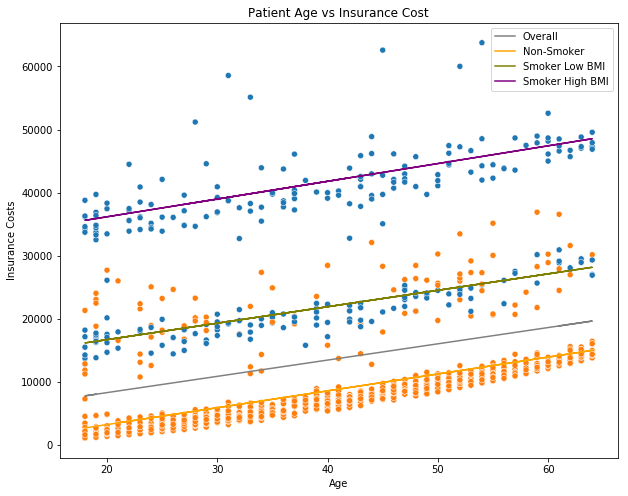

In the above figure, the non-smokers are the orange dots and the smokers are the blue dots.
Each patient "group" has a line of best fit and there is also a line of best fit for the overall data.



<Figure size 432x288 with 0 Axes>

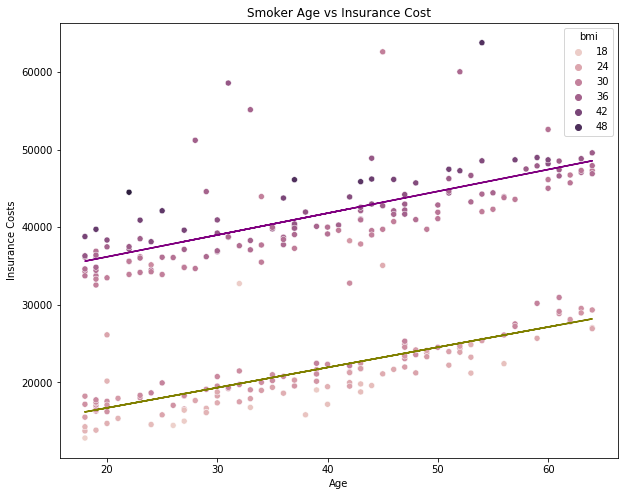

<Figure size 432x288 with 0 Axes>

In [6]:
model = sm.OLS.from_formula('charges ~ age', data = insurance_df)
results = model.fit()

non_smoker_df = insurance_df[insurance_df.smoker=='no']
smoker_lowbmi_df = insurance_df[(insurance_df.smoker=='yes') & (insurance_df.bmi<=30)]
smoker_highbmi_df = insurance_df[(insurance_df.smoker=='yes') & (insurance_df.bmi>=30)]

model_nonsmoker = sm.OLS.from_formula('charges ~ age', data = non_smoker_df)
results_nonsmoker = model_nonsmoker.fit()

model_smoker_lowbmi = sm.OLS.from_formula('charges ~ age', data = smoker_lowbmi_df)
results_smoker_lowbmi = model_smoker_lowbmi.fit()

model_smoker_highbmi = sm.OLS.from_formula('charges ~ age', data = smoker_highbmi_df)
results_smoker_highbmi = model_smoker_highbmi.fit()

corr, p = pearsonr(insurance_df.age, insurance_df.charges)
corr_nonsmoker, p_nonsmoker = pearsonr(non_smoker_df.age, non_smoker_df.charges)
corr_smoker_lowbmi, p_smoker_lowbmi = pearsonr(smoker_lowbmi_df.age, smoker_lowbmi_df.charges)
corr_smoker_highbmi, p_smoker_highbmi = pearsonr(smoker_highbmi_df.age, smoker_highbmi_df.charges)


print('Overall Age-Cost Correlation:{} pavlue:{}'.format(round(corr, 3), round(p, 3)))
print('Increase in insurance costs per year: ${}, Initial cost: ${}'.format(
    round(results.params[1], 2), round(results.predict({'age':[18]})[0])))
print()

print('Increase in (non-smoker)insurance costs per year: ${}, Initial cost: ${}'.format(
    round(results_nonsmoker.params[1], 2), round(results_nonsmoker.predict({'age':[18]})[0])))
print('Non-Smoker Age-Cost Correlation:{} pavlue:{}'.format(round(corr_nonsmoker, 3), round(p_nonsmoker, 3)))
print()

print('Increase in (low-bmi smoker)insurance costs per year: ${}, Initial cost: ${}'.format(
    round(results_smoker_lowbmi.params[1], 2), round(results_smoker_lowbmi.predict({'age':[18]})[0])))
print('Low BMI Smoker Age-Cost Correlation:{} pavlue:{}'.format(round(corr_smoker_lowbmi, 3), round(p_smoker_lowbmi, 3)))
print()

print('Increase in (high-bm smoker)insurance costs per year: ${}, Initial cost: ${}'.format(
    round(results_smoker_highbmi.params[1], 2), round(results_smoker_highbmi.predict({'age':[18]})[0])))
print('High BMI Smoker Age-Cost Correlation:{} pavlue:{}'.format(round(corr_smoker_highbmi, 3), round(p_smoker_highbmi, 3)))

plt.figure(figsize=(10,8))
sns.scatterplot(data=insurance_df, x='age', y='charges', hue = 'smoker')
plt.plot(insurance_df.age.to_numpy(), results.predict(), color='gray')
plt.plot(non_smoker_df.age.to_numpy(), results_nonsmoker.predict(), color='orange')
plt.plot(smoker_lowbmi_df.age.to_numpy(), results_smoker_lowbmi.predict(), color='olive')
plt.plot(smoker_highbmi_df.age.to_numpy(), results_smoker_highbmi.predict(), color='purple')
plt.legend(['Overall', 'Non-Smoker', 'Smoker Low BMI', 'Smoker High BMI'])
plt.title('Patient Age vs Insurance Cost')
plt.xlabel('Age')
plt.ylabel('Insurance Costs')
plt.show()
plt.clf()

print('In the above figure, the non-smokers are the orange dots and the smokers are the blue dots.')
print('Each patient "group" has a line of best fit and there is also a line of best fit for the overall data.')
print()

plt.figure(figsize=(10,8))
sns.scatterplot(data=insurance_df[insurance_df.smoker=='yes'], x='age', y='charges', hue = 'bmi')
plt.plot(smoker_lowbmi_df.age.to_numpy(), results_smoker_lowbmi.predict(), color='olive')
plt.plot(smoker_highbmi_df.age.to_numpy(), results_smoker_highbmi.predict(), color='purple')
plt.title('Smoker Age vs Insurance Cost')
plt.xlabel('Age')
plt.ylabel('Insurance Costs')
plt.show()
plt.clf()

The overall association between age and insurance costs has a correlation which is positive and weak (0.299), but looking at the scatter plot reveals three clear groups of patients. The group with the lowest insurance costs is the non-smoker group, within this group there is a relatively strong positive correlation (0.628) between age and insurance costs. The group with the highest insurance costs is the the smoker high bmi group, within this group there is relatively strong positive correlation (0.667) between age and insurance costs. The group with insurance costs inbetween the other two groups is the smoker low bmi group, within this group there is strong positive correlation (0.694) between age and insurance costs. Therefore age is a significant factor in the insurance costs. 

* **Location of patients**

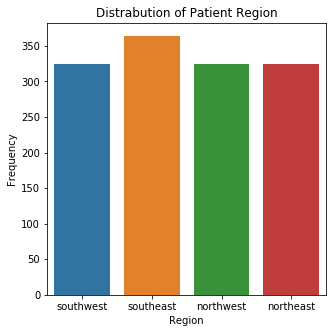

Region Counts
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Region Proportions
southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64


<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data = insurance_df)
plt.title('Distrabution of Patient Region')
plt.xlabel('Region')
plt.ylabel('Frequency')

plt.show()
plt.clf()

print('Region Counts')
print(insurance_df.region.value_counts())
print()
print('Region Proportions')
print(insurance_df.region.value_counts(normalize = True))

These results show that the distrabution of patient regions is nearly uniform.

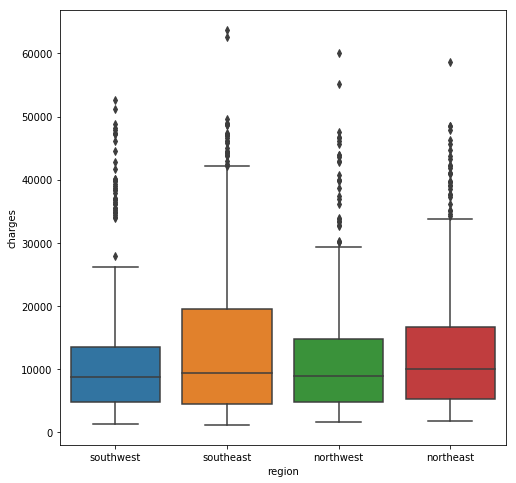

In [8]:
plt.figure(figsize=(8,8))
sns.boxplot(x='region', y = 'charges', data = insurance_df)

This box plot shows that there is significant overlap in the region IQR's and that the average insurance cost for each region is nearly the same. Therefore, the region variable has very little significance in the determination of the insurance cost. 

* **Smoker Costs**

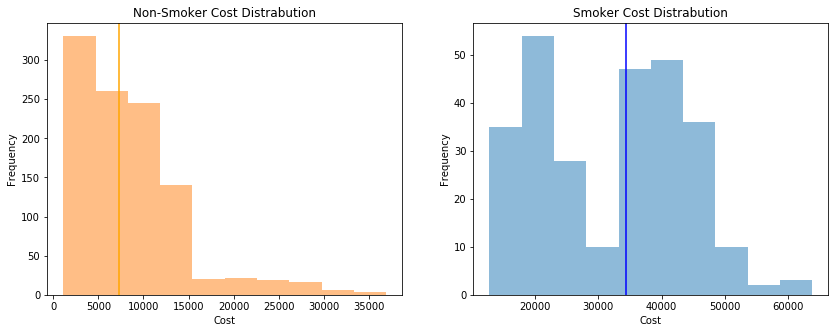

<Figure size 432x288 with 0 Axes>

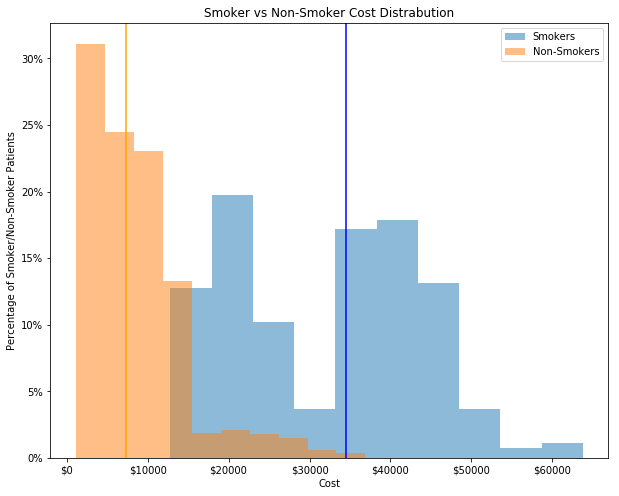

Population Proportions: Smokers: 20.48%, Non-Smokers: 79.52%
The average cost for smokers is $32050.23 and the median cost is $34456(blue line above).
The average cost for non-smokers is $8434.27 and the median cost is $7345(orange line above).
Therefore the average cost for smokers is 3.8 times greater than the average cost for non-smokers!


In [9]:
smokers = insurance_df[insurance_df.smoker == 'yes']
nonsmokers = insurance_df[insurance_df.smoker == 'no']

smoker_cost_avg = smokers.charges.mean()
smoker_cost_med = smokers.charges.median()
nonsmoker_cost_avg = nonsmokers.charges.mean()
nonsmoker_cost_med = nonsmokers.charges.median()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(nonsmokers.charges, alpha = 0.5, color = '#ff7f0e')
plt.axvline(nonsmokers.charges.median(), color = 'orange')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Non-Smoker Cost Distrabution')

plt.subplot(1,2,2)
plt.hist(smokers.charges, alpha = 0.5)
plt.axvline(smokers.charges.median(), color = 'blue')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Smoker Cost Distrabution')

plt.show()
plt.clf()

smoker_bin_hist = np.histogram(smokers.charges)
smoker_bin_counts = smoker_bin_hist[0]
smoker_bin_props = smoker_bin_counts / len(smokers)
smoker_bins = smoker_bin_hist[1]
smoker_bin_width = smoker_bins[1] - smoker_bins[0]

nonsmoker_bin_hist = np.histogram(nonsmokers.charges)
nonsmoker_bin_counts = nonsmoker_bin_hist[0]
nonsmoker_bin_props = nonsmoker_bin_counts / len(nonsmokers)
nonsmoker_bins = nonsmoker_bin_hist[1]
nonsmoker_bin_width = nonsmoker_bins[1] - nonsmoker_bins[0]

plt.figure(figsize = (10, 8))
ax = plt.subplot()
plt.bar(smoker_bins[:-1], smoker_bin_props, alpha = 0.5, width=smoker_bin_width, align='edge')
plt.bar(nonsmoker_bins[:-1], nonsmoker_bin_props, alpha = 0.5, width=nonsmoker_bin_width, align='edge')
plt.legend(['Smokers', 'Non-Smokers'])
plt.axvline(smokers.charges.median(), color = 'blue')
plt.axvline(nonsmokers.charges.median(), color = 'orange')

ax.set_yticks([0.05 * i for i in range(7)])
ax.set_yticklabels(['{}%'.format(i * 5) for i in range(7)])
ax.set_xticks([10000 * i for i in range(7)])
ax.set_xticklabels(['${}'.format(i * 10000) for i in range(7)])

plt.xlabel('Cost')
plt.ylabel('Percentage of Smoker/Non-Smoker Patients')
plt.title('Smoker vs Non-Smoker Cost Distrabution')
plt.show()

print('Population Proportions: Smokers: {}%, Non-Smokers: {}%'.format(
    round(100 * len(smokers) / len(insurance_df),2), round(100 * len(nonsmokers) / len(insurance_df),2)))
print('The average cost for smokers is ${} and the median cost is ${}(blue line above).'.format(
    round(smoker_cost_avg,2), int(smoker_cost_med)))
print('The average cost for non-smokers is ${} and the median cost is ${}(orange line above).'.format(
    round(nonsmoker_cost_avg,2), int(nonsmoker_cost_med)))
print('Therefore the average cost for smokers is {} times greater than the average cost for non-smokers!'.format(
    round(smoker_cost_avg / nonsmoker_cost_avg,2)))

These results show that there is a major difference in costs when compairing smokers to non-smokers. Note that there are many more non-smokers patients (80%) than there are smoker patients (20%). The large difference in patient count is the reason for using patient percent on the y-axis rather than raw counts on the combined histogram.

### Extended Analysis
#### Introduction to Linear Regression
Reggie is a mad scientist who has been hired by the local fast food joint to build their newest ball pit in the play area. As such, he is working on researching the bounciness of different balls so as to optimize the pit. He is running an experiment to bounce different sizes of bouncy balls, and then fitting lines to the data points he records.

_Linear Regression_ is when you have a group of points on a graph, and you find a line that approximately resembles that group of points. A good Linear Regression algorithm minimizes the _error_, or the distance from each point to the line. A line with the least error is the line that fits the data the best. We call this a line of _best fit_.

Reggie has run an experiment and come up with the following data:

In [10]:
ball_data = [(1, 2), (2, 1), (3, 4), (4, 4), (5, 3)]

The first datapoint, `(1, 2)`, means that the 1cm bouncy ball bounced 2 meters. Similarly `(4, 4)` means the 4cm bouncy ball bounced 4 meters. To get a sense of the data we use a scatter plot below:

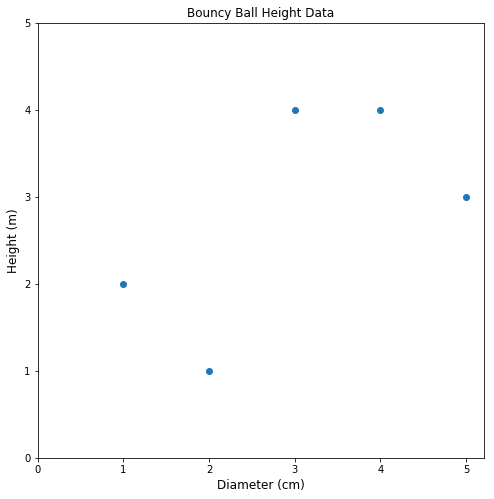

<Figure size 432x288 with 0 Axes>

In [11]:
ball_diameters = [data_point[0] for data_point in ball_data]
bounce_heights = [data_point[1] for data_point in ball_data]

plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.scatter(x=ball_diameters, y=bounce_heights)
ax.set_xticks([x for x in range(6)])
ax.set_yticks([y for y in range(6)])
plt.xlabel('Diameter (cm)', fontsize = 'large')
plt.ylabel('Height (m)', fontsize = 'large')
plt.title('Bouncy Ball Height Data')
plt.show()
plt.clf()

For linear regressions we assume the relationship between the size(diameter) of the ball and the bounce height is linear. This means we get the formula: <br><br>
$$ \text{Height} = m \cdot \text{Diameter} + b$$ <br>
where m is the slope of the line and b is the y-intercept of the line. Lets try a few values for m and b to see how well they align with the data.

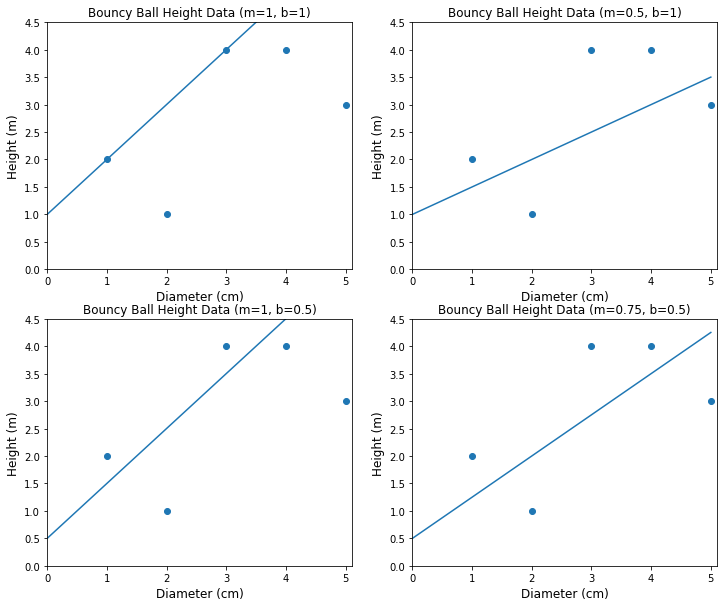

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(12, 10))
ax = plt.subplot()

x_values = range(6)

m1, b1 = 1, 1
plt.subplot(2,2,1)
plt.scatter(x=ball_diameters, y=bounce_heights)
plt.plot(x_values, [m1 * x + b1 for x in x_values])
plt.xlim(0,5.1)
plt.ylim(0,4.5)
ax.set_xticks(x_values)
plt.xlabel('Diameter (cm)', fontsize = 'large')
plt.ylabel('Height (m)', fontsize = 'large')
plt.title('Bouncy Ball Height Data (m={}, b={})'.format(m1,b1))

m2, b2 = 0.5, 1
plt.subplot(2,2,2)
plt.scatter(x=ball_diameters, y=bounce_heights)
plt.plot(x_values, [m2 * x + b2 for x in x_values])
plt.xlim(0,5.1)
plt.ylim(0,4.5)
ax.set_xticks(x_values)
plt.xlabel('Diameter (cm)', fontsize = 'large')
plt.ylabel('Height (m)', fontsize = 'large')
plt.title('Bouncy Ball Height Data (m={}, b={})'.format(m2,b2))

m3, b3 = 1, 0.5
plt.subplot(2,2,3)
plt.scatter(x=ball_diameters, y=bounce_heights)
plt.plot(x_values, [m3 * x + b3 for x in x_values])
plt.xlim(0,5.1)
plt.ylim(0,4.5)
ax.set_xticks(x_values)
plt.xlabel('Diameter (cm)', fontsize = 'large')
plt.ylabel('Height (m)', fontsize = 'large')
plt.title('Bouncy Ball Height Data (m={}, b={})'.format(m3,b3))

m4, b4 = 0.75, 0.5
plt.subplot(2,2,4)
plt.scatter(x=ball_diameters, y=bounce_heights)
plt.plot(x_values, [m4 * x + b4 for x in x_values])
plt.xlim(0,5.1)
plt.ylim(0,4.5)
ax.set_xticks(x_values)
plt.xlabel('Diameter (cm)', fontsize = 'large')
plt.ylabel('Height (m)', fontsize = 'large')
plt.title('Bouncy Ball Height Data (m={}, b={})'.format(m4,b4))

plt.show()
plt.clf()

To measure how well the line fits the data we calculate the error at each data point, then sum them all together. For example, lets consider the function <br>using **m = 0.5** and **b = 1** (top right figure above) meaning we are using the function <br><br>
$$ \text{Height} = 0.5 \cdot \text{Diameter} + 1$$ <br> to estimate the height of the bouncy balls. Now consider the bouncy ball with diameter 1 cm, using our slope of 0.5 and intercept of 1 we would predict that the 1cm ball would bounce 1.5 meters high: $$ \text{Height} = 0.5 \cdot 1 + 1 = 1.5$$ <br>
The real 1cm ball bounced 2 m high so our prediction function had an _error_ of 0.5 m. If we repeat this process for all the data points we will get a list of errors. The _total error_ of our prediction function is the sum of all the errors in the list. For our function using **m = 0.5** and **b = 1** we get that the _total error_ is 4.5 m. This is visualized below:

In [13]:
d = {'Diameter (cm)': [1, 2, 3, 4, 5], 
     'Height (m)': [2,1,4,4,3],
     'Estimated Height (m)': [1.5, 2, 2.5, 3, 3.5],
     'Error': [0.5, 1, 1.5, 1, 0.5]}
ball_df = pd.DataFrame(data=d)
print('\033[1m' + 'Total error: {} + {} + {} + {} + {} = {}'.format(
    ball_df.Error[0], ball_df.Error[1], ball_df.Error[2], ball_df.Error[3], ball_df.Error[4], ball_df.Error.sum()))
ball_df

Total error: 0.5 + 1.0 + 1.5 + 1.0 + 0.5 = 4.5


,Diameter (cm),Height (m),Estimated Height (m),Error
0,1,2,1.5,0.5
1,2,1,2.0,1.0
2,3,4,2.5,1.5
3,4,4,3.0,1.0
4,5,3,3.5,0.5


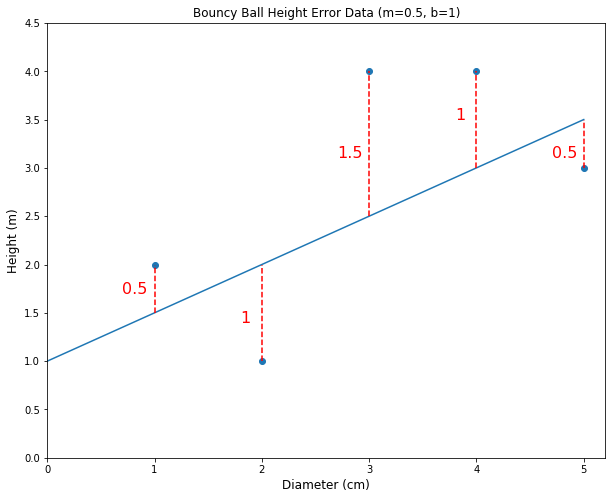

Total error: 0.5 + 1.0 + 1.5 + 1.0 + 0.5 = 4.5 m


<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 8))
ax = plt.subplot()
m2, b2 = 0.5, 1
plt.scatter(x=ball_diameters, y=bounce_heights)
plt.plot(x_values, [m2 * x + b2 for x in x_values])

plt.axvline(x=1,ymin=1.5/4.5,ymax=2/4.5, color = 'r', linestyle = '--')
plt.text(0.7,1.7,'0.5',fontsize=16, color='r')

plt.axvline(x=2,ymin=1/4.5,ymax=2/4.5, color = 'r', linestyle = '--')
plt.text(1.8,1.4,'1',fontsize=16, color='r')

plt.axvline(x=3,ymin=2.5/4.5,ymax=4/4.5, color = 'r', linestyle = '--')
plt.text(2.7,3.1,'1.5',fontsize=16, color='r')

plt.axvline(x=4,ymin=3/4.5,ymax=4/4.5, color = 'r', linestyle = '--')
plt.text(3.8,3.5,'1',fontsize=16, color='r')

plt.axvline(x=5,ymin=3/4.5,ymax=3.5/4.5, color = 'r', linestyle = '--')
plt.text(4.7,3.1,'0.5',fontsize=16, color='r')
plt.xlim(0,5.2)
plt.ylim(0,4.5)
ax.set_xticks(x_values)
plt.xlabel('Diameter (cm)', fontsize = 'large')
plt.ylabel('Height (m)', fontsize = 'large')
plt.title('Bouncy Ball Height Error Data (m={}, b={})'.format(m2,b2))
plt.show()
plt.clf()
print('\033[1m' + 'Total error: {} + {} + {} + {} + {} = {} m'.format(
    ball_df.Error[0], ball_df.Error[1], ball_df.Error[2], ball_df.Error[3], ball_df.Error[4], ball_df.Error.sum()))

So for the function using **m = 0.5** and **b = 1** we got a _total error_ of 4.5 m. Our goal will be to try to find the values of **m** and **b** that minimizes the total error. The basic strategy is just try out a large number of these **m** and **b** combinations, then choose the one with the lowest _total error_. <br><br>

The list `possible_ms` goes from -10 to 10 inclusive, in increments of 0.1. `possible_ms = [-10, -9.9, -9.8, ..., 9.9, 10]`.<br>
The list `possible_bs` goes from -20 to 20 inclusive, in increments of 0.1. `possible_bs = [-20, -19.9, -19.8, ..., 19.9, 20]`<br>
Since there are 201 values in `possible_ms` and 401 values in `possible_bs` we will be checking 201 × 401 = **80,601 possible combinations!**

In [15]:
possible_ms = [m / 10 for m in range(-100, 101)]
possible_bs = [b / 10 for b in range(-200, 201)]

First, we will define our helper functions which help us calculate the predicted height, error for a given data point and _total error_ for a given combination of **m** and **b**.

In [16]:
def get_height(m, b, diameter):
    return m * diameter + b

def get_height_error(m, b, datapoint):
    diameter = datapoint[0]
    height = datapoint[1]
    return abs(height - get_height(m, b, diameter))

def get_height_total_error(m, b, datapoints):
    return sum([get_height_error(m, b, point) for point in datapoints])

Just to see if the functions work, we test them on our example of **m = 0.5** and **b = 1**:

In [17]:
get_height_total_error(m=0.5, b=1, datapoints=ball_data)

4.5

Now we will just loop through all of the **m** and **b** combinations to find the one with the lowest total error. 

In [18]:
smallest_error = float('inf')
best_m, best_b = 0, 0
error_data = {'m':[], 'b':[], 'error':[]}

for m in possible_ms:
    for b in possible_bs:
        total_error = get_height_total_error(m, b, ball_data)
        error_data['m'].append(m)
        error_data['b'].append(b)
        error_data['error'].append(total_error)
        if total_error < smallest_error:
            smallest_error = total_error
            best_m = m
            best_b = b
print('Best m and b combination: m = {} and b = {}. Total Error: {} m'.format(best_m, best_b, smallest_error))

Best m and b combination: m = 0.3 and b = 1.7. Total Error: 4.0 m


It turns out that there are four **m** and **b** combinations that have the minimum total error of 4 m. If we wanted to, we could decrease the increment size in our `possible_ms` and `possible_bs` lists from 0.1 to 0.01 and focus around the ranges 0-1 for m and 1-2 for b in order to find an even better prediction function.  

In [19]:
error_array = np.array(error_data['error'])
min_error_val = error_array.min()
min_error_index = np.where(error_array == min_error_val)[0]
min_error_index

for ind in min_error_index:
    print('m={}, b={}, Total error = {}'.format(error_data['m'][ind], error_data['b'][ind], error_data['error'][ind]))

m=0.3, b=1.7, Total error = 4.0
m=0.4, b=1.6, Total error = 4.0
m=0.5, b=1.5, Total error = 4.0
m=0.6, b=1.4, Total error = 4.0


Below is a 3d visualization of the _total error_ of all 80,601 **m** and **b** combinations we checked. 

In [20]:
import plotly.express as px

error_df = pd.DataFrame(error_data)
 
# Run to play with interactible 3d error model
# fig = px.scatter_3d(error_df, x='m', y='b', z='error', color = 'error')
# fig.update_traces(marker_size = 2)
# fig.show()

Picture of 3D error model
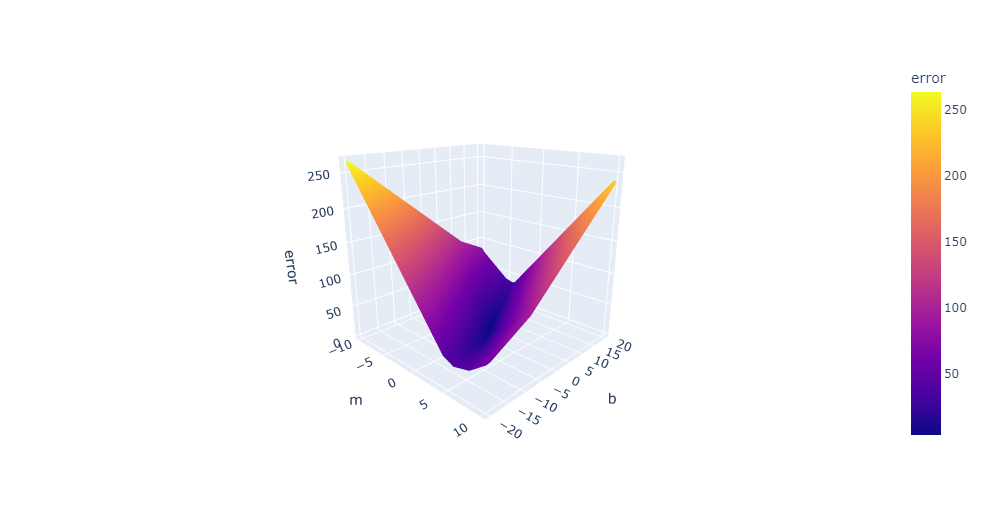

If we zoom in on the dark purple 'valley' in the plot above, we can see our four lines of _best fit_ at the bottom (each have an error of 4.0). 

In [21]:
error_df_best = error_df[error_df.error < 7]

# Run to play with interactible 3d error model
# fig = px.scatter_3d(error_df_best, x='m', y='b', z='error', color = 'error')
# fig.update_traces(marker_size = 2)
# fig.show()

Picture of 3D error model
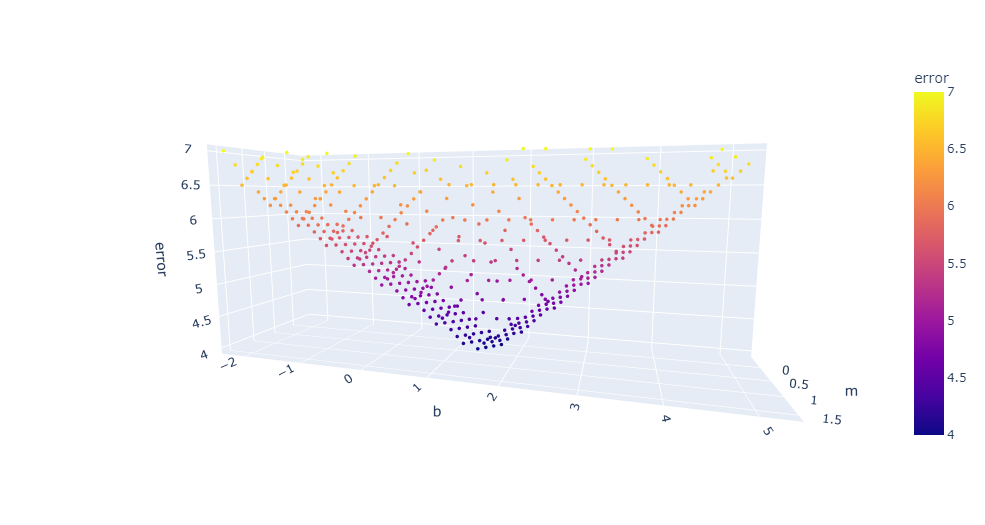

Lets compare the lines of _best fit_ to our example of **m = 0.5** and **b = 1**.

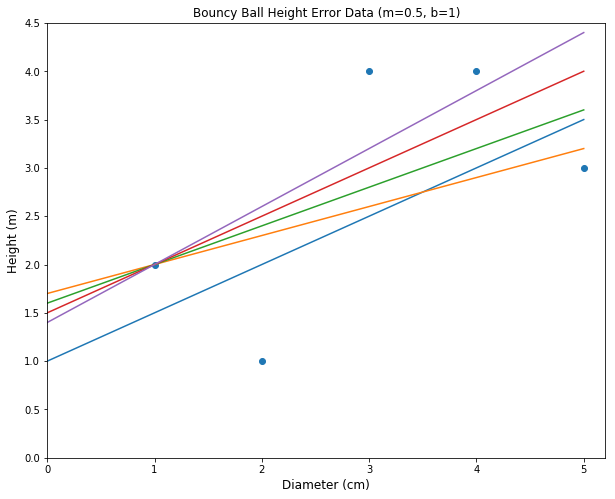

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(10, 8))
ax = plt.subplot()
m2, b2 = 0.5, 1
m_best, b_best = 0.3, 1.7
plt.scatter(x=ball_diameters, y=bounce_heights)
plt.plot(x_values, [m2 * x + b2 for x in x_values])
plt.plot(x_values, [m_best * x + b_best for x in x_values])
plt.plot(x_values, [0.4 * x + 1.6 for x in x_values])
plt.plot(x_values, [0.5 * x + 1.5 for x in x_values])
plt.plot(x_values, [0.6 * x + 1.4 for x in x_values])
plt.xlim(0,5.2)
plt.ylim(0,4.5)
ax.set_xticks(x_values)
plt.xlabel('Diameter (cm)', fontsize = 'large')
plt.ylabel('Height (m)', fontsize = 'large')
plt.title('Bouncy Ball Height Error Data (m={}, b={})'.format(m2,b2))
plt.show()
plt.clf()

At this point, Reggie is done! Reggie can either use the best prediction function (m = 0.3 and b = 1.7) for his research or continue to check different **m** and **b** combinations with more and more precision (check m = 0.31-0.39 and b = 1.71-1.79).  

#### Linear Regression for Insurance Cost estimate
We are going to try to do the same thing we did for Reggie, but instead of predicting height of a bouncy ball, we will try to predict the cost of insurance.<br>
* The first change is that instead of one variable (diameter) we have to worry about six variables (age, sex, bmi, children, smoker, and region)<br><br>
* The second change is that some of our variable are not numerical (sex, smoker, and region)

In [23]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The first thing we are going to do is convert the categorical variables to numerical values so we can use them in mathematical formulas. 

In [24]:
region_order = ['southwest','southeast','northwest','northeast']

insurance_df_num = insurance_df.copy()

insurance_df_num.sex = insurance_df_num.sex.apply(lambda sex: 0 if sex == 'female' else 1)
insurance_df_num.smoker = insurance_df_num.smoker.apply(lambda s: 0 if s == 'no' else 1)
insurance_df_num.region = insurance_df_num.region.apply(lambda r: region_order.index(r))

insurance_df_num.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


For Reggie's linear regressions we assumed the relationship between the size(diameter) of the ball and the bounce height was linear. This meant we got the formula: <br><br>
$$ \text{Height} = m \cdot \text{Diameter} + b$$<br>
For the insurance data we also assume a linear relationship. This time it's between the six variables and the cost. This means we get a similar formula:<br><br>
$$ \text{Cost} = m_{1} \cdot \text{Age} \; + m_{2} \cdot \text{Sex} \; + m_{3} \cdot \text{Bmi} \; + m_{4} \cdot \text{Children} \; + m_{5} \cdot \text{Smoker} \; + m_{6} \cdot \text{Region} \; + b$$ <br>

where the m's are the slope of the line in each variables direction and b is the y-intercept of the line.

Our goal will be to try to find the values of **m<sub>1</sub>**, **m<sub>2</sub>**, ..., **m<sub>6</sub>** and **b** that minimizes the total error. The basic strategy of just trying out a large number of combinations will not work in this case. Consider the following example: <br><br>

The list `possible_m1s` goes from -10 to 10 inclusive, in increments of 0.1. `possible_m1s = [-10, -9.9, -9.8, ..., 9.9, 10]`.<br>
The list `possible_m2s` goes from -10 to 10 inclusive, in increments of 0.1. `possible_m2s = [-10, -9.9, -9.8, ..., 9.9, 10]`.<br>...<br>
The list `possible_m6s` goes from -10 to 10 inclusive, in increments of 0.1. `possible_m6s = [-10, -9.9, -9.8, ..., 9.9, 10]`.<br>
The list `possible_bs` goes from -10 to 10 inclusive, in increments of 0.1. `possible_bs = [-10, -9.9, -9.8, ..., 9.9, 10]`.<br><br>
Since there are 201 values in all seven of these lists, we would have to check 201<sup>7</sup> = **13,254,776,280,841,401 possible combinations!** This would take the computer eons to complete and that is only checking values between -10 and 10.

I have developed a different method to find the best combination of **m's** and **b**. It involves checking over big ranges to start, then honing in on the best combination. It would take a lot of space to explain it in detail so skip to the bottom to see the results.  

Convert the data columns to numpy ndarray's to speed up calculations

In [25]:
insurance_age = np.array(insurance_df_num.age)
insurance_sex = np.array(insurance_df_num.sex)
insurance_bmi = np.array(insurance_df_num.bmi)
insurance_children = np.array(insurance_df_num.children)
insurance_smoker = np.array(insurance_df_num.smoker)
insurance_region = np.array(insurance_df_num.region)

insurance_data_array = np.array([insurance_age, insurance_sex, insurance_bmi, 
                                 insurance_children, insurance_smoker, insurance_region]).transpose()

insurance_charges = np.array(insurance_df_num.charges)

We again set up our helper functions

In [26]:
# The basic loop-based helper functions
# def estimate_cost(factors):
#     return insurance_age * factors[0] + insurance_sex * factors[1] + insurance_bmi * factors[2] \
#     + insurance_children * factors[3] + insurance_smoker * factors[4] + insurance_region * factors[5] + factors[6]

# def calc_error(factors):
#     return np.absolute(insurance_charges - estimate_cost(factors))

# def total_error(factors):
#     return np.sum(calc_error(factors))



# The numpy-based helper functions
def estimate_all_costs(possible_factors):
    p_factors_T = possible_factors.transpose()
    mult_data = np.matmul(insurance_data_array, p_factors_T[:-1])
    return mult_data + p_factors_T[-1]

def calc_all_errors(possible_factors):
    return np.abs(estimate_all_costs(possible_factors).transpose() - insurance_charges).transpose()

def calc_all_total_errors(possible_factors):
    return np.sum(calc_all_errors(possible_factors), axis=0)

def get_best_error_combo(possible_factors):
    all_total_errors = calc_all_total_errors(possible_factors)
    min_error_index = np.argmin(all_total_errors)
    return all_total_errors[min_error_index], possible_factors[min_error_index]



# Generate the new possible factor combos list
def get_factor_combos(possible_age_ms, possible_sex_ms, possible_bmi_ms, possible_children_ms, 
                      possible_smoker_ms, possible_region_ms, possible_bs):
    return np.array(np.meshgrid(possible_age_ms, possible_sex_ms, possible_bmi_ms, 
                                possible_children_ms, possible_smoker_ms, possible_region_ms, possible_bs)).T.reshape(-1,7)

Set the inital factor combinations 

In [27]:
possible_age_ms = np.array([-100, 0, 100])
possible_sex_ms = np.array([-100, 0, 100])
possible_bmi_ms = np.array([-100, 0, 100])
possible_children_ms = np.array([-100, 0, 100])
possible_smoker_ms = np.array([-100, 0, 100])
possible_region_ms = np.array([-100, 0, 100])
possible_bs = np.array([-100, 0, 100])
possible_mbs = [possible_age_ms, possible_sex_ms, possible_bmi_ms, 
                possible_children_ms, possible_smoker_ms, possible_region_ms, possible_bs]

possible_factor_combos = get_factor_combos(possible_age_ms, possible_sex_ms, possible_bmi_ms, possible_children_ms, 
                                           possible_smoker_ms, possible_region_ms, possible_bs)
best_combos = []
best_errors = []

step = 100
steps = [100]
step_changes = [0]

Set number of rounds of trial and error

In [28]:
rounds = 1700
display_10_percent_rounds = [i * int(rounds / 10) for i in range(1,10)]

Go through the possible combinations of **m's** and **b**, find the best combination and update the next set of possible combinations. Along the way, reduce the increment size if the best combination starts to stagnate.

In [29]:
for round_index in range(rounds):
    if round_index in display_10_percent_rounds:
        print('{} %'.format(int(100 * round_index / rounds)))
    
    if step == 0:
        print('No further optimization')
        break
               
    min_error, best_combo = get_best_error_combo(possible_factor_combos)
    
    best_combos.append(best_combo)
    best_errors.append(min_error)
    
    if len(best_combos) > 1 and (best_combos[-2] == best_combos[-1]).all():
        step_changes.append(round_index)
        step = int(step / 2)
        steps.append(step)
        
        if step == 0:
            print('No further optimization')
            break
        
        for possible_mb in possible_mbs:
            possible_mb[0] = possible_mb[1] - step
            possible_mb[-1] = possible_mb[1] + step
    else:
        for factor_index in range(len(best_combo)):
            best_factor = best_combo[factor_index]
            if best_factor == possible_mbs[factor_index][0]:           
                possible_mbs[factor_index] -= step 
            elif best_factor == possible_mbs[factor_index][-1]:           
                possible_mbs[factor_index] += step         
    
    possible_factor_combos = get_factor_combos(possible_age_ms, possible_sex_ms, possible_bmi_ms, possible_children_ms, 
                                           possible_smoker_ms, possible_region_ms, possible_bs)
    
print('Done!')

10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
No further optimization
Done!


Below are some plots visualizing how the _total error_ of the best estimate function decreases over the number of iterations in the regression.

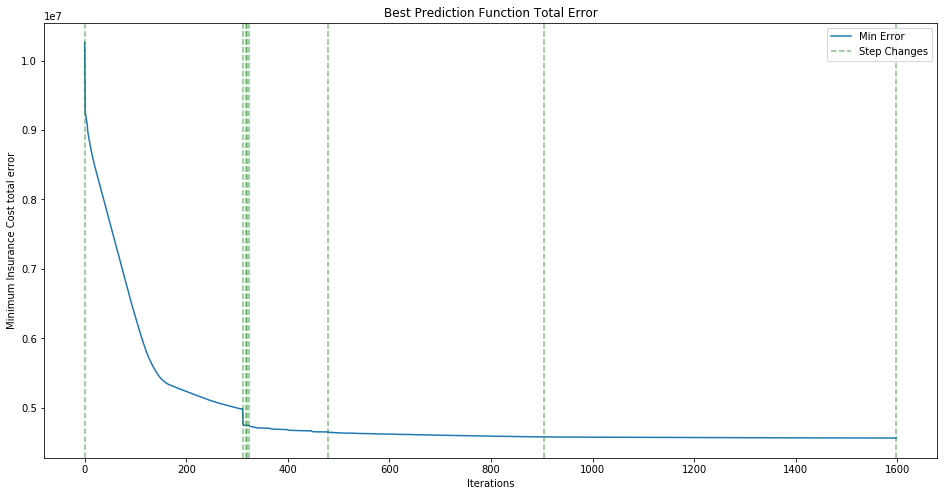

<Figure size 432x288 with 0 Axes>

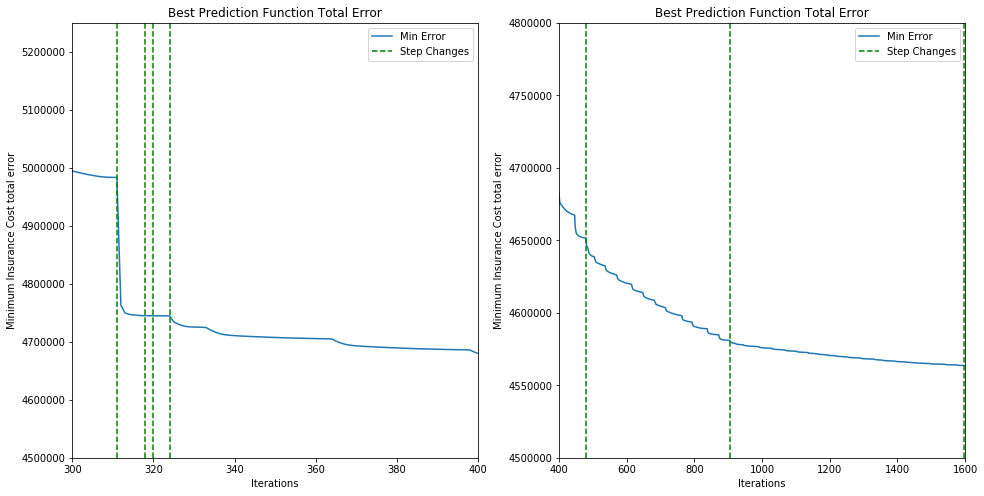

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize =(16,8))
plt.plot(best_errors)

for change in step_changes:
    plt.axvline(change, linestyle='--', alpha = 0.5, color='g')

plt.title('Best Prediction Function Total Error')
plt.xlabel('Iterations')
plt.ylabel('Minimum Insurance Cost total error')
plt.legend(['Min Error','Step Changes'], loc=1)
plt.show()
plt.clf()

plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
plt.plot(best_errors)
for change in step_changes:
    plt.axvline(change, linestyle='--', color='g')
plt.ylim(4500000, 5250000)    
plt.xlim(300, 400)
plt.title('Best Prediction Function Total Error')
plt.xlabel('Iterations')
plt.ylabel('Minimum Insurance Cost total error')
plt.legend(['Min Error','Step Changes'], loc=1)

plt.subplot(1,2,2)
plt.plot(best_errors)
for change in step_changes:
    plt.axvline(change, linestyle='--', color='g')
plt.ylim(4500000, 4800000)    
plt.xlim(400, 1600)
plt.title('Best Prediction Function Total Error')
plt.xlabel('Iterations')
plt.ylabel('Minimum Insurance Cost total error')
plt.legend(['Min Error','Step Changes'], loc=1)

plt.show()
plt.clf()

In [31]:
print('Best combination: m1 = {}, m2 = {}, m3 = {}, m4 = {}, m5 = {}, m6 = {}, b = {}'.format(
    best_combos[-1][0], best_combos[-1][1], best_combos[-1][2], 
    best_combos[-1][3], best_combos[-1][4], best_combos[-1][5], best_combos[-1][6], ))
print('Total error: ${}, Average Error: ${}'.format(best_errors[-1], round(best_errors[-1] / len(insurance_df),2)))

Best combination: m1 = 262, m2 = -422, m3 = 29, m4 = 394, m5 = 31234, m6 = 221, b = -4694
Total error: $4563704.041599003, Average Error: $3410.84


So after the linear regression we get that the line of _best fit_ is:<br><br>
$$ \text{Cost} = 262 \cdot \text{Age} \; - 422 \cdot \text{Sex} \; + 29 \cdot \text{Bmi} \; + 394 \cdot \text{Children} \; + 31234 \cdot \text{Smoker} \; + 221 \cdot \text{Region} \; - 4694$$<br>
This line has a _total error_ of about \$4,563,704.04 over 1338 patients which averages to be about \$3,410.84 per patient. Some notes on the significance of the **m's**:
* **m<sub>5</sub> = 31234** is the slope related to the smoker variable and is significantly larger than the other slopes. This suggests that smoking has the largest impact on insurance cost. Since 'Smoker' can either be 1 or 0, the line of best fit predicts that smokers will pay \$31,234 more than non-smokers.<br><br>
* **m<sub>2</sub> = -422** is the slope related to the sex variable and is the only negative slope. Since 'Sex' is 1 when the patient is male and 0 if the patient is female, the line of best fit predicts that men will pay \$422 less than women.<br><br>

Let's test this predition function with a random patient to see how well the prediction function works

In [32]:
random_patient_index = np.random.randint(0, len(insurance_df))

insurance_df[insurance_df.index == random_patient_index]                                       

,age,sex,bmi,children,smoker,region,charges
719,58,female,33.44,0,no,northwest,12231.6136


In [33]:
random_patient_df = insurance_df_num[insurance_df_num.index == random_patient_index].reset_index()

random_patient_data = random_patient_df.squeeze(axis=0)

estimated_random_patient_cost = 262 * random_patient_data.age - 422 * random_patient_data.sex + 29 * random_patient_data.bmi \
+ 394 * random_patient_data.children + 31234 * random_patient_data.smoker + 221 * random_patient_data.region - 4694

print('Estimated insurance cost: ${}'.format(round(estimated_random_patient_cost, 2)))
print('Difference bewtween estimated and actual insurance costs: ${}'.format(
    round(abs(estimated_random_patient_cost - random_patient_data.charges),2)))

Estimated insurance cost: $11913.76
Difference bewtween estimated and actual insurance costs: $317.85
